# Analysis the Burned Area Dataset

by Xikun Hu



In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from numpy import datetime64
from ipywidgets import interact 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.simplefilter('ignore')
from dask.diagnostics import ProgressBar
import matplotlib.cm as cm

In [ ]:
xr.show_versions()

In [2]:
ESDC_img = xr.open_zarr("/home/jovyan/work/datacube/ESDCv2.0.0/esdc-8d-0.25deg-1x720x1440-2.0.0.zarr")

In [3]:
ESDC_time = xr.open_zarr("/home/jovyan/work/datacube/ESDCv2.0.0/esdc-8d-0.25deg-184x90x90-2.0.0.zarr")

In [4]:
ESDC_img = ESDC_img.burnt_area

In [ ]:
Europe = ESDC_img.sel(lat = slice(70.,30.), lon = slice(-20.,35.))

In [ ]:
## time series from 2000 to 2015
Europe = Europe.sel(time = slice('1995-08-01','2014-07-30'))

## First methof to sum the time dimension based on Xarray

In [ ]:
%time Europe_BA_time = Europe.sum(dim='time').compute()

In [ ]:
from matplotlib.colors import LogNorm
plt.figure()
Europe_BA_time.plot()
# plt.savefig('Sum_API_time_dimension.png', dpi = 500,bbox_inches='tight')

## Get the one dimensional value for Burned Area based on Numpy

In [ ]:
Europe_1 = Europe.values

In [ ]:
Europe_1.shape

In [ ]:
sum_axis_0_BA = np.sum(Europe_1, axis=0)

In [ ]:
sum_axis_0_BA.shape

In [ ]:
plt.imshow(sum_axis_0_BA)

In [ ]:
# plt.imshow(sum_axis_0_BA_thre)

In [ ]:
from matplotlib.colors import LogNorm
plt.figure()
plt.imshow(sum_axis_0_BA, norm=LogNorm()) # show the value as logNorm
# plt.imshow(sum_axis_0_BA)
plt.colorbar()
# plt.show()
plt.savefig('BA_sum_all_years_logNorm.png', dpi=500, bbox_inches='tight')

In [ ]:
# get the threshold value over than 10 000
sum_axis_0_BA_thre = (sum_axis_0_BA > 10000) * sum_axis_0_BA
sum_axis_0_BA_thre.shape

In [ ]:
# total burned area 
tba = sum_axis_0_BA.sum().sum()
tba

In [ ]:
from matplotlib.colors import LogNorm
plt.figure()
plt.imshow(sum_axis_0_BA_thre, norm=LogNorm()) # show the value as logNorm
# plt.imshow(sum_axis_0_BA)
plt.colorbar()
# plt.show()
# plt.axis([30, 60, 100, 140])
plt.savefig('BA_sum_all_years_logNorm_10000Thre.png', dpi=500, bbox_inches='tight')

In [ ]:
from matplotlib.colors import LogNorm
plt.figure()
plt.imshow(sum_axis_0_BA_thre, norm=LogNorm()) # show the value as logNorm
# plt.imshow(sum_axis_0_BA)
plt.colorbar()
# plt.show()
plt.axis([30, 60, 140, 100])
plt.savefig('BA_sum_all_years_logNorm_1000Thre_Region_30_60_140_100.png', dpi=500, bbox_inches='tight')

# Study area - spatial analysis

In [ ]:
# lat = slice(45.,35.)
# lon = slice(-12.5,-5.)
ESDC_img = xr.open_zarr("/home/jovyan/work/datacube/ESDCv2.0.0/esdc-8d-0.25deg-1x720x1440-2.0.0.zarr")

In [6]:
Europe_study_area = ESDC_img.sel(lat = slice(45.,35.), lon = slice(-12.5,-5.))
Europe_study_area_year = Europe_study_area.sel(time = slice('1995-08-01','2014-07-30'))
BA_year = Europe_study_area_year.burnt_area.groupby('time.year').sum(dim='time')

In [ ]:
BA_year_value = BA_year.values
BA_year_value_sum = np.sum(BA_year_value, axis = 1)
BA_year_value_sum = np.sum(BA_year_value_sum, axis = 1)

In [ ]:
BA_year_value_sum

In [ ]:
# BA_year.plot.imshow(x='lon',y='lat',col='year',col_wrap=5)

In [ ]:
plt.figure()
BA_year.plot.imshow(x='lon',y='lat',col='year',col_wrap=5)
plt.savefig('Portugal_BA_group_Year.png', dpi = 500,bbox_inches='tight')

In [ ]:
## find the dramatic year of burned area
# 2003

In [ ]:
Europe_study_area_selected_year = Europe_study_area.sel(time=slice('2003-01-01', '2003-12-31'))
BA_month = Europe_study_area_selected_year.burnt_area.groupby('time.month').sum(dim='time')

In [ ]:
BA_month_value = BA_month.values
BA_month_value_sum = np.sum(BA_month_value, axis = 1)
BA_month_value_sum = np.sum(BA_month_value_sum, axis = 1)
BA_month_value_sum

In [ ]:
plt.figure()
BA_month.plot.imshow(x='lon',y='lat',col='month',col_wrap=4)
plt.savefig('Portugal_BA_group_Month.png', dpi = 500,bbox_inches='tight')

In [5]:
Europe_study_area = ESDC_img.sel(lat = slice(45.,35.), lon = slice(-12.5,-5.))
Europe_study_area_selected_month = Europe_study_area.sel(time=slice('2003-08-01', '2003-08-30'))
# BA_week = Europe_study_area_selected_month.burnt_area.groupby('time.week').sum(dim='time')

In [8]:
Europe_study_area_selected_month

<xarray.DataArray 'burnt_area' (time: 4, lat: 40, lon: 30)>
dask.array<shape=(4, 40, 30), dtype=float32, chunksize=(1, 40, 30)>
Coordinates:
  * lat      (lat) float32 44.875 44.625 44.375 44.125 ... 35.625 35.375 35.125
  * lon      (lon) float32 -12.375 -12.125 -11.875 ... -5.625 -5.375 -5.125
  * time     (time) datetime64[ns] 2003-08-01 2003-08-09 2003-08-17 2003-08-25
Attributes:
    ID:                        54
    esa_cci_path:              nan
    long_name:                 Monthly Burnt Area
    orig_attrs:                {'comment': 'Burnt Area based on the GFED4 fir...
    orig_version:              gfed4
    project_name:              GFED4
    time_coverage_end:         2014-03-02
    time_coverage_resolution:  P8D
    time_coverage_start:       1995-01-05
    units:                     hectares
    url:                       http://www.globalfiredata.org/

In [18]:
Europe_BA_time_month_sum = Europe_study_area_selected_month.mean(dim='time').compute()

In [6]:
def above_Nsigma(x,Nsigma):
    return xr.ufuncs.fabs(x)>Nsigma

In [9]:
res_BA_August = Europe_study_area_selected_month.apply(above_Nsigma, Nsigma = 1000)

AttributeError: 'DataArray' object has no attribute 'apply'

In [ ]:
fig2, ax2 = plt.subplots(figsize = [7,5], ncols=1)

res.res_BA_August.plot(ax = ax2)
ax2.set_title("No of BA over 1000 ha")

plt.tight_layout()
plt.savefig('BA_over_1000ha.png', dpi = 500,bbox_inches='tight')

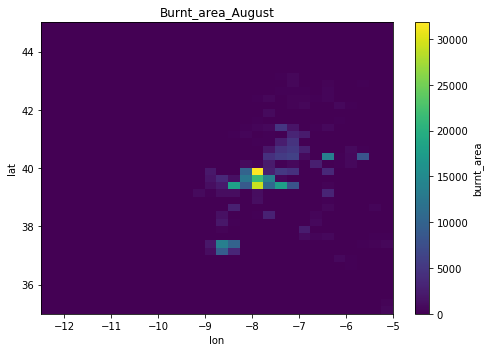

In [10]:
fig2, ax2 = plt.subplots(figsize = [7,5], ncols=1)

Europe_BA_time_month_sum.plot(ax = ax2)
ax2.set_title("Burnt_area_August")

plt.tight_layout()
plt.savefig('Sum_API_time_dimension_August.png', dpi = 500,bbox_inches='tight')

In [ ]:
BA_week_value = BA_week.values
BA_week_value_sum = np.sum(BA_week_value, axis = 1)
BA_week_value_sum = np.sum(BA_week_value_sum, axis = 1)
BA_week_value_sum

In [ ]:
plt.figure()
BA_week.plot.imshow(x='lon',y='lat',col='week',col_wrap=2)
plt.savefig('Portugal_BA_group_week.png', dpi = 500,bbox_inches='tight')

## Time Series Analysis

In [ ]:
Europe_study_area = ESDC_img.sel(lat = slice(45.,35.), lon = slice(-12.5,-5.))
Europe_study_area_year = Europe_study_area.sel(time = slice('1995-08-01','2014-07-24'))
BA_ts = Europe_study_area_year.burnt_area

In [ ]:
BA_ts

In [ ]:
BA_ts_mean = BA_ts.mean(dim='lon').mean(dim='lat')
fig, ax = plt.subplots(figsize = [14,5], ncols=2)

BA_ts_mean.plot(ax = ax[0], color ='red', marker ='.')
ax[0].set_title("Burnt Area in Portugal")
BA_ts_mean.plot.hist(ax = ax[1], color ='blue',bins = 100)
ax[1].set_xlabel("Burnt Area (hactares)")
plt.tight_layout()
plt.savefig('Portugal_BA_TS.png', dpi = 500,bbox_inches='tight')

## Temperature and Precipitation Analysis

In [8]:
Europe_study_area = ESDC_img.sel(lat = slice(45.,35.), lon = slice(-12.5,-5.))
Europe_study_area_year = Europe_study_area.sel(time = slice('1995-08-01','2014-07-24'))
Pre_ts = Europe_study_area_year.precipitation
Tem_ts = Europe_study_area_year.air_temperature_2m
CE_ts = Europe_study_area_year.c_emissions

In [9]:
print(CE_ts)

<xarray.DataArray 'c_emissions' (time: 874, lat: 40, lon: 30)>
dask.array<shape=(874, 40, 30), dtype=float32, chunksize=(1, 40, 30)>
Coordinates:
  * lat      (lat) float32 44.875 44.625 44.375 44.125 ... 35.625 35.375 35.125
  * lon      (lon) float32 -12.375 -12.125 -11.875 ... -5.625 -5.375 -5.125
  * time     (time) datetime64[ns] 1995-08-01 1995-08-09 ... 2014-07-24
Attributes:
    ID:                        53
    esa_cci_path:              nan
    long_name:                 Carbon Dioxide Emissions Due to Natural Fires
    orig_attrs:                {'comment': 'Carbon emissions by fires based o...
    orig_version:              gfed4
    project_name:              GFED4
    time_coverage_end:         2010-12-31
    time_coverage_resolution:  P8D
    time_coverage_start:       2001-01-05
    units:                     g C m-2 month-1
    url:                       http://www.globalfiredata.org/


In [ ]:
# print(LE_ts)

In [ ]:
BA_ts_mean = BA_ts.mean(dim='lon').mean(dim='lat')
Pre_ts_mean = Pre_ts.mean(dim='lon').mean(dim='lat')
Tem_ts_mean = Tem_ts.mean(dim='lon').mean(dim='lat')

fig = plt.subplots(figsize = [14,5])

# BA_ts_mean.plot(ax = ax[0], color ='red', marker ='.')
# ax[0].set_title("Burnt Area in Portugal")
# Pre_ts_mean.plot(ax = ax[1], color ='blue', marker ='*')
Tem_ts_mean.plot(color ='cyan', marker ='o')

# ax[1].set_ylabel("Burnt Area (hactares)")
# plt.tight_layout()
plt.savefig('Portugal_Tem_TS.png', dpi = 500,bbox_inches='tight')

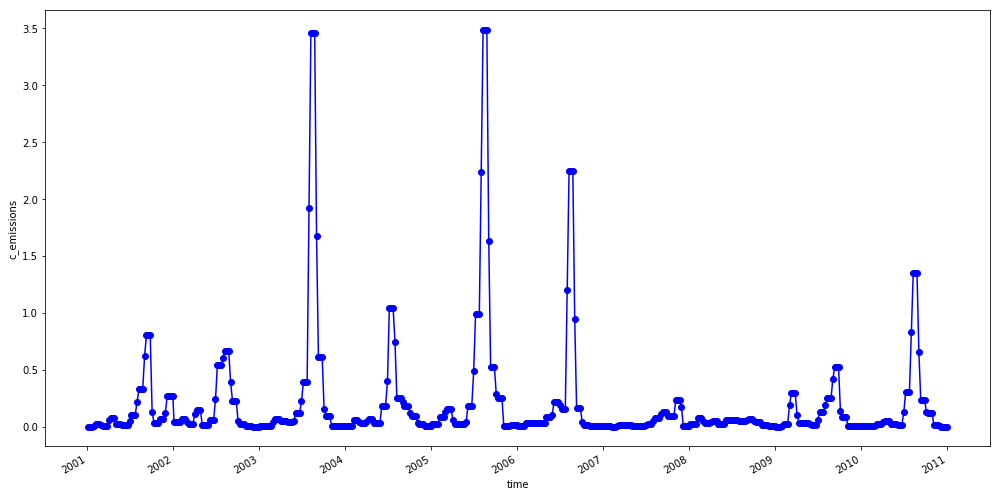

In [12]:
CE_ts_mean = CE_ts.mean(dim='lon').mean(dim='lat')
# LE_ts_mean = LE_ts.mean(dim='lon').mean(dim='lat')

fig, ax = plt.subplots(figsize = [14,7], nrows=1)

# ST_ts_mean.plot(ax = ax[0], color ='red', marker ='.')
# ax[0].set_title("Burnt Area in Portugal")
CE_ts_mean.plot(ax = ax, color ='blue', marker = 'o')
# ax[1].set_xlabel("Burnt Area (hactares)")
plt.tight_layout()
plt.savefig('Portugal_CE_TS.png', dpi = 500,bbox_inches='tight')